In [7]:
import geopandas
import numpy as np
import pandas as pd
import xarray as xr
from scipy.stats import lognorm,cumfreq
from src.calculate_ds import calc_dwi
import matplotlib.pyplot as plt



### Load Building data


In [4]:
df_build_fac = geopandas.read_file('DATA/bld_sc/bldPort_TV0_siteclasses.shp')

### Calculating the weighted damage states ($DS_i$) for TV0<sub>pga</sub> as a result of $N_e'$  earthquakes




In [38]:
DSwi=[]
for build in df_build_fac.index.values:
    if df_build_fac.iloc[build]['vulnStrEQ']=='BrM+LC+LR':
        tb='T1'
    elif df_build_fac.iloc[build]['vulnStrEQ']=='BrCfl+LC+LR':
        tb='T2' 
    elif df_build_fac.iloc[build]['vulnStrEQ']=='BrCri+LC+LR':
        tb='T3' 
    dwi=calc_dwi(tb,build)
    DSwi.append(dwi)

### Calculating and plotting $D_i$ for individual site classes 

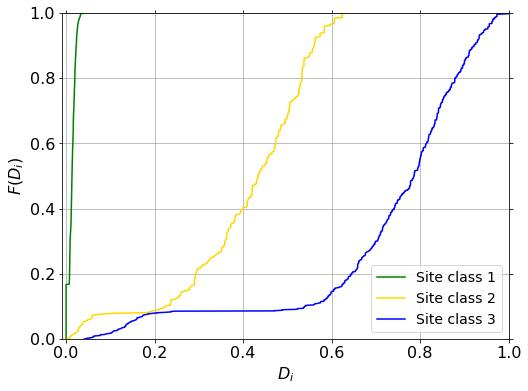

In [39]:
DSi=np.sum(np.array(DSwi),axis=2)
di=np.mean(DSi,axis=1)/np.max(np.mean(DSi,axis=1))
fig=plt.figure(figsize=(8,6))
site1 = np.sort(di[df_build_fac['cluster'] == 0])
site2 = np.sort(di[df_build_fac['cluster'] == 1])
site3 = np.sort(di[df_build_fac['cluster'] == 2])
ecdfs1 = np.arange(0, len(site1)) / (len(site1) - 1)
ecdfs2 = np.arange(0, len(site2)) / (len(site2) - 1)
ecdfs3 = np.arange(0, len(site3)) / (len(site3) - 1)

# Create the ECDF plot
plt.plot(site1, ecdfs1, label='Site class 1',c='green')
plt.plot(site2, ecdfs2, label='Site class 2',c='gold')
plt.plot(site3, ecdfs3, label='Site class 3',c='blue')
plt.xlabel(r'$D_i$',fontsize=16)
plt.ylabel(r'$F(D_i)$',fontsize=16)
plt.xlim((-0.009, 1.0))
plt.ylim((0.0, 1.0))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(top=True, right=True)
plt.grid()
plt.legend(loc='lower right',handlelength=2,fontsize=14)


### Calculating $DS_i$ after assigning single typology to each building in TV0<sub>pga</sub>

In [ ]:
eq=20 #total number of Ne' earthquakes
typologies=['T1','T2','T3'] # typol
DSwi_all=np.zeros((len(typologies),len(df_build_fac.index.values),eq,4))
for itb,tb in enumerate(typologies):
    DSwi=[]
    for build in df_build_fac.index.values:
        dwi=calc_dwi(tb,build)
        DSwi.append(dwi)
    DSwi_all[itb]=np.array(DSwi)

### Calculating and plotting $D_i$ for individual site classes for single typology cases

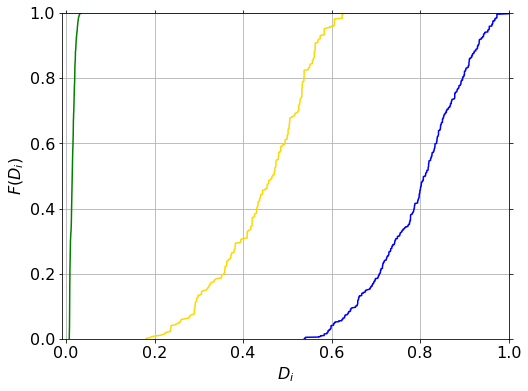

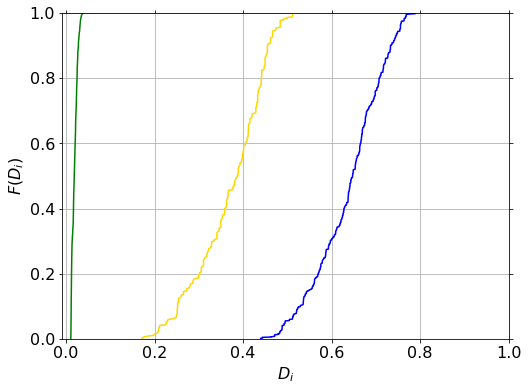

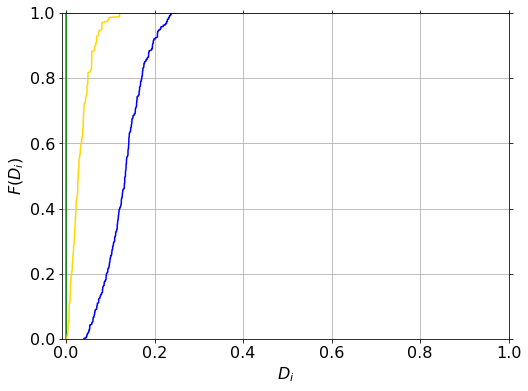

In [37]:
DSi_all=np.sum(DSwi_all,axis=3)
for i in range(len(typologies)):
    DSi_t=np.sum(DSwi_all[i],axis=2)   
    di_t=np.mean(DSi_t,axis=1)/np.max(np.mean(DSi_all,axis=2))
    fig=plt.figure(figsize=(8,6))
    
    site1 = np.sort(di_t[df_build_fac['cluster'] == 0])
    site2 = np.sort(di_t[df_build_fac['cluster'] == 1])
    site3 = np.sort(di_t[df_build_fac['cluster'] == 2])
    ecdfs1 = np.arange(0, len(site1)) / (len(site1) - 1)
    ecdfs2 = np.arange(0, len(site2)) / (len(site2) - 1)
    ecdfs3 = np.arange(0, len(site3)) / (len(site3) - 1)
    # Create the ECDF plot
    plt.plot(site1, ecdfs1, label='Site class 1',c='green')
    plt.plot(site2, ecdfs2, label='Site class 2',c='gold')
    plt.plot(site3, ecdfs3, label='Site class 3',c='blue')
    plt.xlabel(r'$D_i$',fontsize=16)
    plt.ylabel(r'$F(D_i)$',fontsize=16)
    plt.xlim((-0.009, 1.0))
    plt.ylim((0.0, 1.0))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid()
    plt.tick_params(top=True, right=True)